👉 Please upload your city_day.csv file


Saving city_day.csv to city_day.csv
🔍 Missing values per column:
 Xylene        18109
PM10          11140
NH3           10328
Toluene        8041
Benzene        5623
AQI            4681
AQI_Bucket     4681
PM2.5          4598
NOx            4185
O3             4022
SO2            3854
NO2            3585
NO             3582
CO             2059
Date              0
City              0
dtype: int64


/tmp/ipython-input-43495862.py:33: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[num_cols] = df[num_cols].fillna(method="ffill").fillna(df[num_cols].mean())


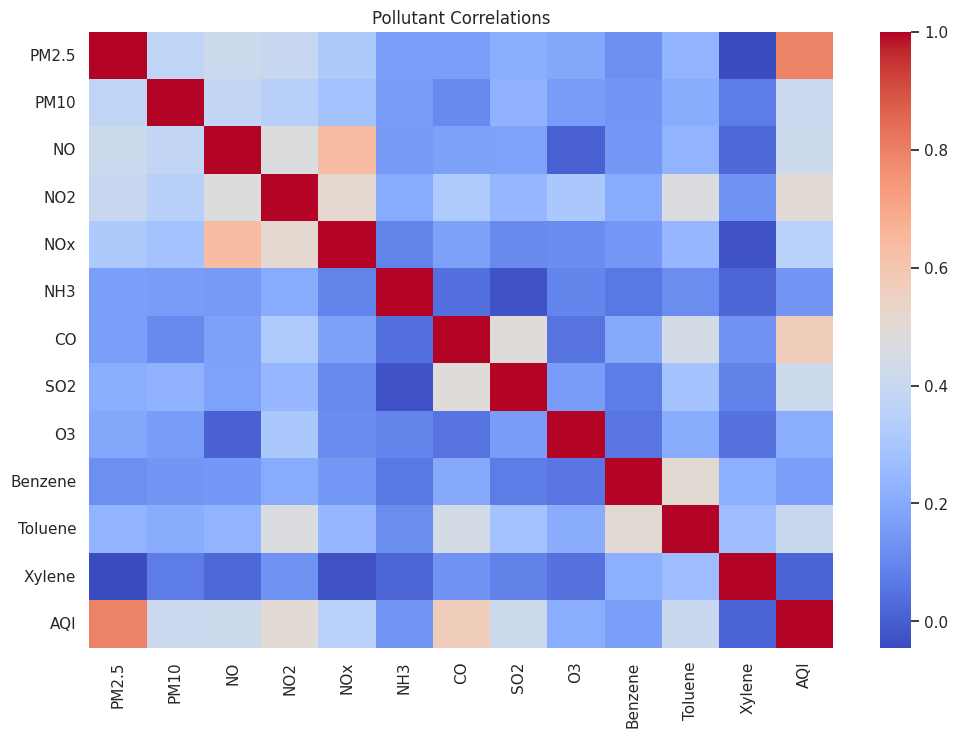

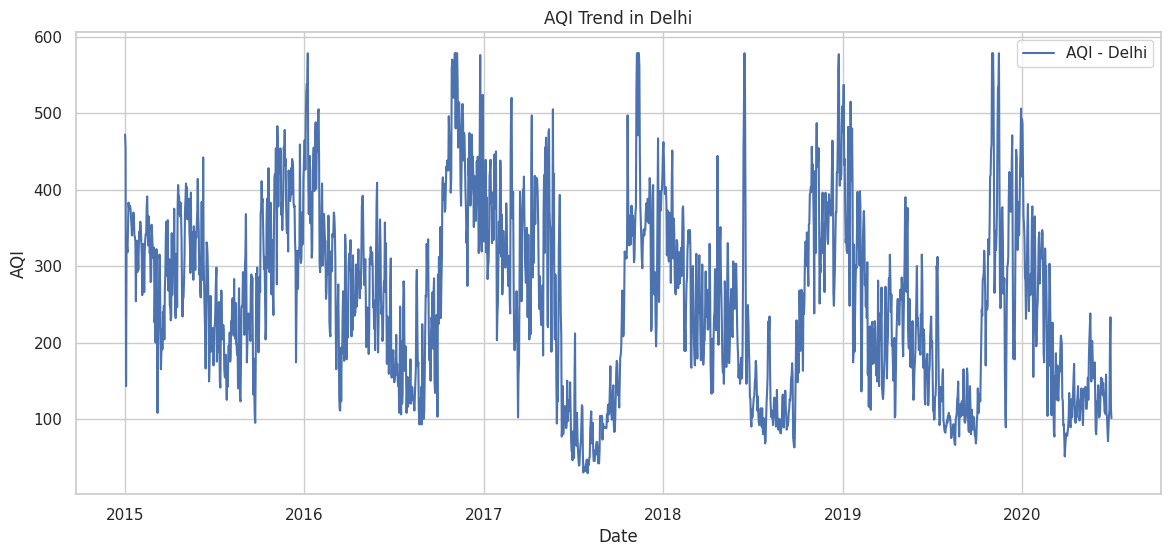

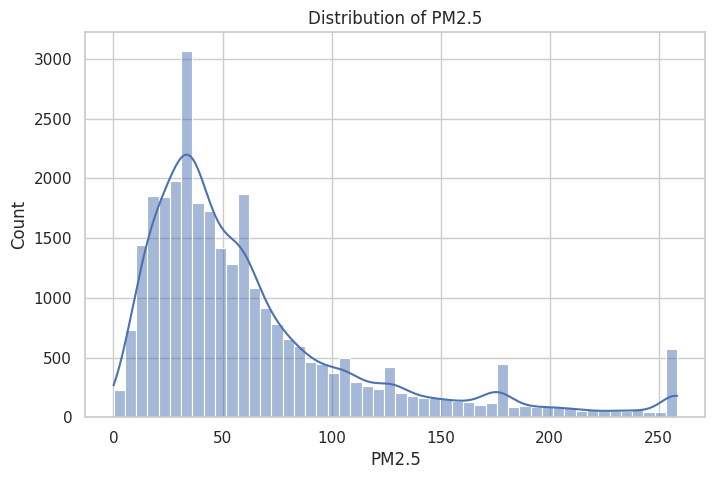

/tmp/ipython-input-43495862.py:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="Month", y="AQI", data=df, estimator="mean", ci=None)


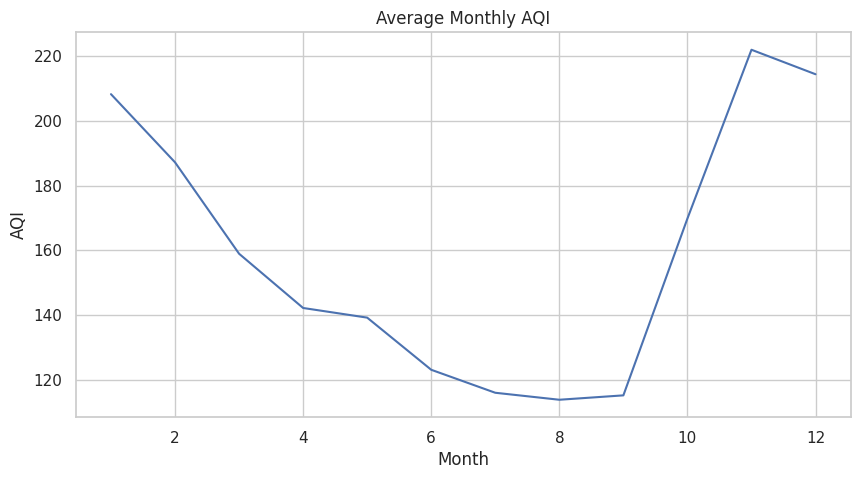

/tmp/ipython-input-43495862.py:81: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Weekday", y="AQI", data=df, estimator="mean", ci=None,


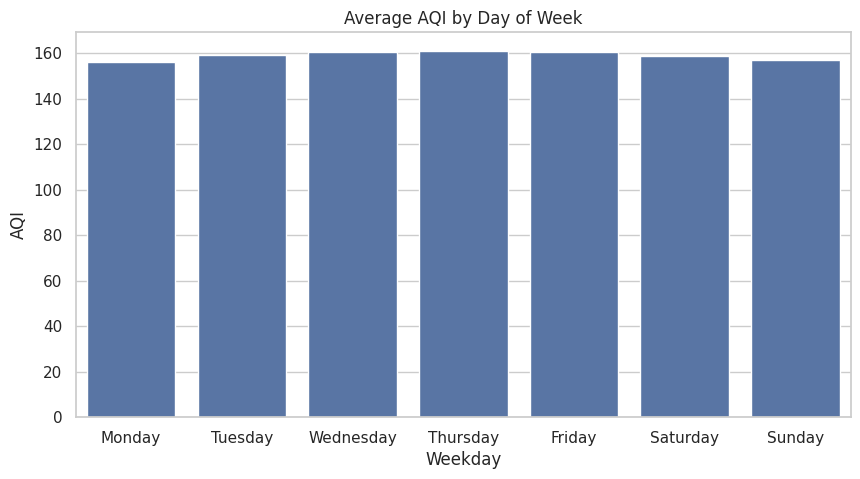

✅ Cleaned dataset saved as city_day_cleaned.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# =====================================
# AirAware Project - Milestone 1
# Data Preprocessing & EDA
# =====================================

# Step 1: Install + Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files

sns.set(style="whitegrid")
pd.set_option("display.max_columns", None)

# Step 2: Upload Dataset
print("👉 Please upload your city_day.csv file")
uploaded = files.upload()

# Load dataset
df = pd.read_csv("city_day.csv")

# Step 3: Convert Date Column
df["Date"] = pd.to_datetime(df["Date"])

# Step 4: Missing Value Report
missing = df.isnull().sum().sort_values(ascending=False)
print("🔍 Missing values per column:\n", missing)

# Step 5: Handle Missing Values
num_cols = df.select_dtypes(include=["float64"]).columns
df[num_cols] = df[num_cols].fillna(method="ffill").fillna(df[num_cols].mean())
df["AQI_Bucket"] = df["AQI_Bucket"].fillna("Unknown")

# Step 6: Handle Outliers (Z-score capping)
for col in num_cols:
    mean = df[col].mean()
    std = df[col].std()
    upper, lower = mean + 3*std, mean - 3*std
    df[col] = np.clip(df[col], lower, upper)

# Step 7: Feature Engineering
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df["Weekday"] = df["Date"].dt.day_name()
df["Season"] = df["Month"]%12 // 3 + 1   # 1=Winter,2=Spring,3=Summer,4=Fall

# Step 8: Exploratory Data Analysis

# 8.1 Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols].corr(), cmap="coolwarm", annot=False)
plt.title("Pollutant Correlations")
plt.show()

# 8.2 AQI Trend (Example: Delhi)
city = "Delhi"
plt.figure(figsize=(14,6))
df_city = df[df["City"] == city]
plt.plot(df_city["Date"], df_city["AQI"], label=f"AQI - {city}")
plt.xlabel("Date"); plt.ylabel("AQI")
plt.title(f"AQI Trend in {city}"); plt.legend()
plt.show()

# 8.3 Distribution of PM2.5
plt.figure(figsize=(8,5))
sns.histplot(df["PM2.5"], bins=50, kde=True)
plt.title("Distribution of PM2.5")
plt.show()

# 8.4 Average AQI by Month
plt.figure(figsize=(10,5))
sns.lineplot(x="Month", y="AQI", data=df, estimator="mean", ci=None)
plt.title("Average Monthly AQI")
plt.show()

# 8.5 Average AQI by Weekday
plt.figure(figsize=(10,5))
sns.barplot(x="Weekday", y="AQI", data=df, estimator="mean", ci=None,
            order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.title("Average AQI by Day of Week")
plt.show()

# Step 9: Save Cleaned Dataset
df.to_csv("city_day_cleaned.csv", index=False)
print("✅ Cleaned dataset saved as city_day_cleaned.csv")

# Step 10: Download Cleaned Dataset
files.download("city_day_cleaned.csv")
